In [1]:
import os
from io import BytesIO

import matplotlib.pyplot as plt
import requests
import torch
from PIL import Image
from torchvision import transforms

c:\Users\hiroga\miniconda3\envs\til-machine-learning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.makedirs("images", exist_ok=True)

url = "https://images.unsplash.com/photo-1569383746724-6f1b882b8f46"
response = requests.get(url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    image.save("images/Chefchaouen.jpg") # シャウエン
    print("Image downloaded successfully.")
else:
    print("Failed to download the image.")

Image downloaded successfully.


In [3]:
cropper = transforms.CenterCrop(100)
cropped = cropper(image)
cropped.save("images/Chefchaouen-cropped.jpg")

torch.Size([3, 100, 100])
R: tensor([[0.4745, 0.4392, 0.2784],
        [0.4902, 0.4431, 0.3020],
        [0.5059, 0.3608, 0.2627]]), G: tensor([[0.6118, 0.6196, 0.5294],
        [0.6275, 0.6314, 0.5686],
        [0.6392, 0.5529, 0.5451]]), B: tensor([[0.7294, 0.7608, 0.7020],
        [0.7529, 0.7804, 0.7451],
        [0.7765, 0.7137, 0.7333]])


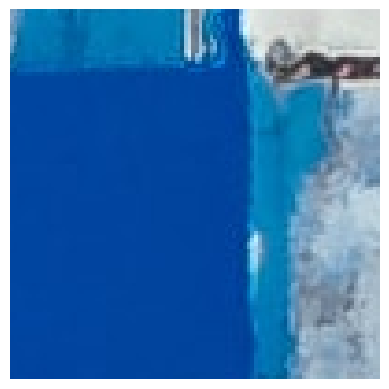

In [4]:
# See image converted as tensor
traonsform = transforms.Compose([
    transforms.CenterCrop(100),
    transforms.ToTensor()
])
tensor = traonsform(image)
print(tensor.shape)

# RGBの順番であること、値が0から1の間であることを確認
print(f"R: {tensor[0, :3, :3]}, G: {tensor[1, :3, :3]}, B: {tensor[2, :3, :3]}")

plt.imshow(tensor.permute(1, 2, 0))
plt.axis('off')
plt.show()

In [5]:
normalizer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])
normalized = normalizer(image)
normalized_image = transforms.ToPILImage()(normalized)
normalized_image.save("images/Chefchaouen-normalized.jpg")


In [6]:
# 平均と標準偏差に、ImageNetの平均と標準偏差を使用する
normalizer = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
normalized = normalizer(image)
normalized_image = transforms.ToPILImage()(normalized)
normalized_image.save("images/Chefchaouen-normalizedbyimagenet.jpg")

# 正規化すると、RGBの値が負の値を取りうるので、プレビューしても自然な画像にはならない。
print(f"R: {normalized[0, :3, :3]}, G: {normalized[1, :3, :3]}, B: {normalized[2, :3, :3]}")

R: tensor([[-0.6965, -0.6794, -0.6452],
        [-0.6794, -0.6794, -0.6623],
        [-0.6623, -0.6623, -0.6623]]), G: tensor([[1.7983, 1.8158, 1.8508],
        [1.8158, 1.8158, 1.8333],
        [1.8333, 1.8333, 1.8333]]), B: tensor([[2.2914, 2.3088, 2.3437],
        [2.3088, 2.3088, 2.3263],
        [2.3263, 2.3263, 2.3263]])


In [7]:
# 正規化した画像のRGB値にImageNetの平均を足して、正規化の影響を可視化する。
normalized_plus_mean = normalized + torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
normalized_plus_mean_image = transforms.ToPILImage()(normalized_plus_mean)
normalized_plus_mean_image.save("images/Chefchaouen-normalizedplusmean.jpg")